# **THE ADULT INCOME DATASET**
## **Description**
### **Title of Database:** adult.csv
#### **Sources :** 
*  **Original owners of database :** US Census Bureau  
*  **Donor of database :** Ronny Kohavi and Barry Becker
*  **Date received :**  05/19/96

#### **Number of Instances :**
* **48842** instances, mix of continuous and discrete (train=**32561**, test=**16281**)
* **45222** if instances with unknown values are removed (train=**30162**, test=**15060**)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

#### **Number of Attributes :**
* **6** continuous, **8** nominal attributes.

#### **Attribute Information/Fearures/Columns :**

* Input variables are a mixture of numerical and categorical or ordinal data types, where the non-numerical columns are represented using strings.
* **age :** continuous.
* **workclass :** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt :** continuous.(not important)
* **education :** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num :** continuous.
* **marital-status :** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation :** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship :** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race :** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex :** Female, Male.
* **capital-gain :** continuous.
* **capital-loss :** continuous.
* **hours-per-week :** continuous.
* **native-country :** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **income :**There are two class values of income ‘>50K‘ and ‘<=50K‘.This is the target variable and it is represented using strings
 
#### **Missing Values :**
* **7%** rows have missing values. 


## Importing The Required Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Loading the data(CSV) file :
* In this file contain some missing values in from of '?' so at import time we have to change into 'NAN'

In [0]:
df = pd.read_csv("adult.csv",na_values=['?'])

## Display Analysis :

In [429]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [430]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


**OBSERVATION** It the display top and bottom 5 rows of dataframe.

In [431]:
original_df=df.shape[0]
print("Number of rows in the data set :",df.shape[0])
print("Number of columns in the data set :",df.shape[1])

Number of rows in the data set : 48842
Number of columns in the data set : 15


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**OBSERVATION**
* In this dataset there is **6** numerical columns and **9** categorical columns
* **Continuous value :** age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week

* **Categorical\Discrete values :** workclass, education, marital-status, occupation, relationship, race, gender, native_country, *income*

In [433]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


**OBSERVATION**
* Range can be calculated for each numerical column 
[min-max]. 
* No. of unique values can be found for non-numerical columns.
* We can find the most repeated item (mode) in non-numerical columns (top) and also find its frequency (freq). 
* Detect the outliers if there is any drastic difference between mean and median (50%).
* We can find the spread by 75% - 25%.

**age**
* Range : [17-90]
* It contain less outliers.
* Spread : 20.00

**workclass**
* Unique values : 8
* Most of have Private (33906 people) workclass.

**education**
* Unique values : 16
* Most of people are higher school graduate (15784 people).

**educational-num**
* Range : [1-16]
* It have no outliers.
* Spread : 3

**marital_status**
* Unique values : 7
* Most of people are married civilian spouse (22397 people).

**occupation**
* Unique values : 14
* Most of people are prof-specialty (6172 people) occupation.

**relationship**
* Unique values : 6
* Most of people have Husband (19716 people) relationship.

**race**
* Unique values : 5
* Most of people have White (41762 people) race.

**gender**
* Unique values : 2
* Most of people working are Male (32650 people).

**capital-gain**
* Range : [0-99999]
* It contain more number of outliers.

**capital-loss**
* Range : [0-4356]
* It contain more number of outliers.

**hours-per-week**
* Range : [0-99]
* It contain no outliers.
* Spread : 5.00

**native-country**
* Unique values : 41
* Most of people are having native country of united-states (43832 people).

**income**
* Unique values : 2
* Most of people have income less than 50k (37155 people).

## HANDLING MISSING VALUES :

In [434]:
print(df.isnull().sum())
print("\nTotal missing values in Dataframe :",df.isnull().sum().sum())

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Total missing values in Dataframe : 6465


**OBSERVATION**
* workclass's null value is 2799
* occupation's null value is 2809
* native-country's null value is 857
* Total null values in dataframe are 6465

In [435]:
df.loc[df["workclass"].isnull(),["occupation","workclass","native-country"]]

,occupation,workclass,native-country
4,NaN,NaN,United-States
6,NaN,NaN,United-States
13,NaN,NaN,United-States
22,NaN,NaN,United-States
35,NaN,NaN,United-States
...,...,...,...
48811,NaN,NaN,United-States
48812,NaN,NaN,United-States
48820,NaN,NaN,United-States
48822,NaN,NaN,United-States


**OBSERVATION**
* workclass and occupation are having null values simultaneously
* most of null values of workclass and occupation are from united states

In [0]:
# droping those row which contain null values
df.dropna(inplace=True)

In [437]:
print(df.isnull().sum())
print("\nTotal missing values in Dataframe :",df.isnull().sum().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Total missing values in Dataframe : 0


**OBSERVATION :** all null values are removed.

In [438]:
# removing column fnlwgt
df.drop('fnlwgt', axis = 1, inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


**OBERSVATION :** fnlwgt column was removed because it was worthless and to aviod future problem.  

In [439]:
print("Number of rows in the data set :",df.shape[0])
print("Number of columns in the data set :",df.shape[1])

Number of rows in the data set : 45222
Number of columns in the data set : 14


**OBSERVATION :** after removing null values 3620 rows are deleted and 1 worthless column is removed. 

In [440]:
round((100*(original_df-len(df.index))/original_df),3)

7.412

**OBSERVATION :** 7.412% of data is removed as it was worthless

## UNIVARIATE ANALYSIS  :

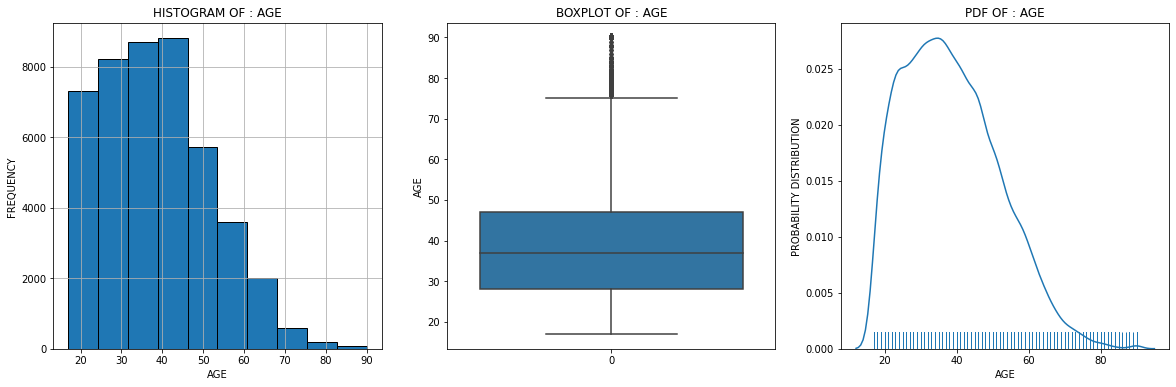

In [441]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
df['age'].hist(edgecolor='black')
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF : AGE")

plt.subplot(1,3,2)
sb.boxplot(data=df['age'])
plt.ylabel("AGE")
plt.title("BOXPLOT OF : AGE")

plt.subplot(1,3,3)
sb.distplot(df['age'],hist=False,rug=True)
plt.xlabel("AGE")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF : AGE")

plt.show()

**OBERSVATION :** 
* Min. age is 17 and Max. age is 90
* Median is around 37
* IQR spread is (47-28) : 19
* Most of people are having age group of 30 - 40
* It is poistive Skewed curve (skewness=0.5328)
* There are so many outliers outside the whiskers.
* Outliers lie above 80 age.
* The PDF is left prominent gaussian distribution that denotes that it is negatively skewed.
* It is not the symmetric distribution.

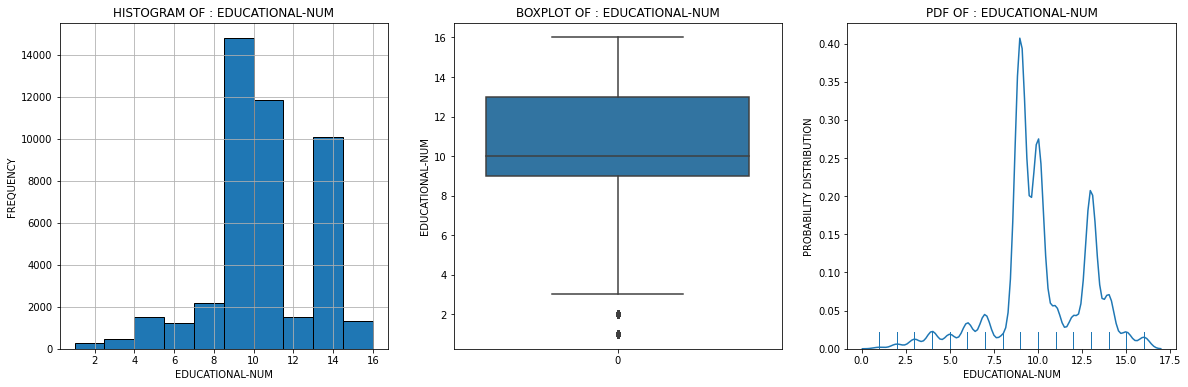

In [442]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
df['educational-num'].hist(edgecolor='black')
plt.xlabel("EDUCATIONAL-NUM")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF : EDUCATIONAL-NUM")

plt.subplot(1,3,2)
sb.boxplot(data=df['educational-num'])
plt.ylabel("EDUCATIONAL-NUM")
plt.title("BOXPLOT OF : EDUCATIONAL-NUM")

plt.subplot(1,3,3)
sb.distplot(df['educational-num'],hist=False,rug=True)
plt.xlabel("EDUCATIONAL-NUM")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF : EDUCATIONAL-NUM")

plt.show()

**OBERSVATION :** 
* Min. educational-num is 1 and Max. educational-num is 16
* Median is around 10
* IQR spread is (13-9) : 4
* Most of educational-num are lie between (8.5-10)
* It is negative skewed curve (skewness=-0.3106)
* There are 2 outilers outside the whiskers.
* Outliers lie below 4.5
* The PDF is not a Gussian normal probability distribution because its kurtosis is positive(not 0).

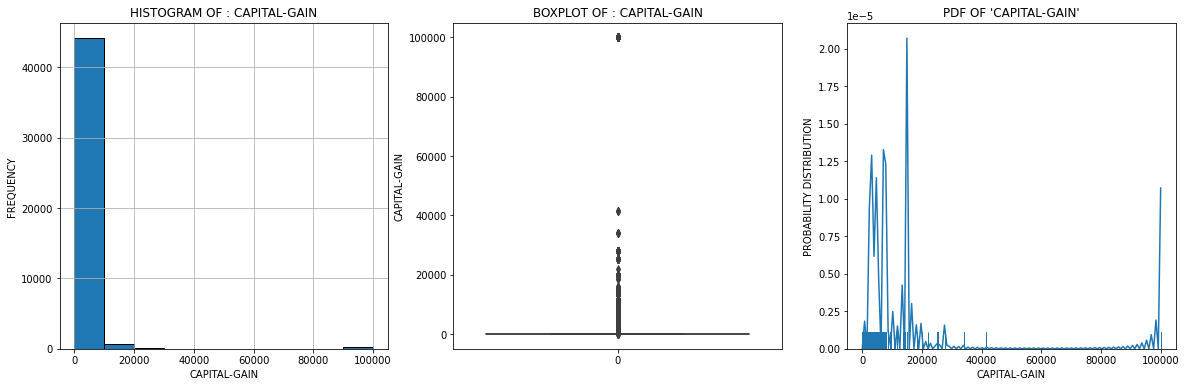

In [443]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
df['capital-gain'].hist(edgecolor='black')
plt.xlabel("CAPITAL-GAIN")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF : CAPITAL-GAIN")

plt.subplot(1,3,2)
sb.boxplot(data=df['capital-gain'])
plt.ylabel("CAPITAL-GAIN")
plt.title("BOXPLOT OF : CAPITAL-GAIN")

plt.subplot(1,3,3)
sb.distplot(df['capital-gain'],hist=False,rug=True)
plt.xlabel("CAPITAL-GAIN")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF 'CAPITAL-GAIN'")

plt.show()

**OBERSVATION :** 
* Min. capital-gain is 0 and Max. capital-gain is 99999
* Median is around 0
* IQR spread is (0-0) : 0
* Most of capital-gain are lie between (0-10000)
* It is high poistive skewed curved (skewness=11.789)
* There are so many outliers.
* We cann't see the clear PDE because the input values are very small as we have seen above the mean and median is near about 0.


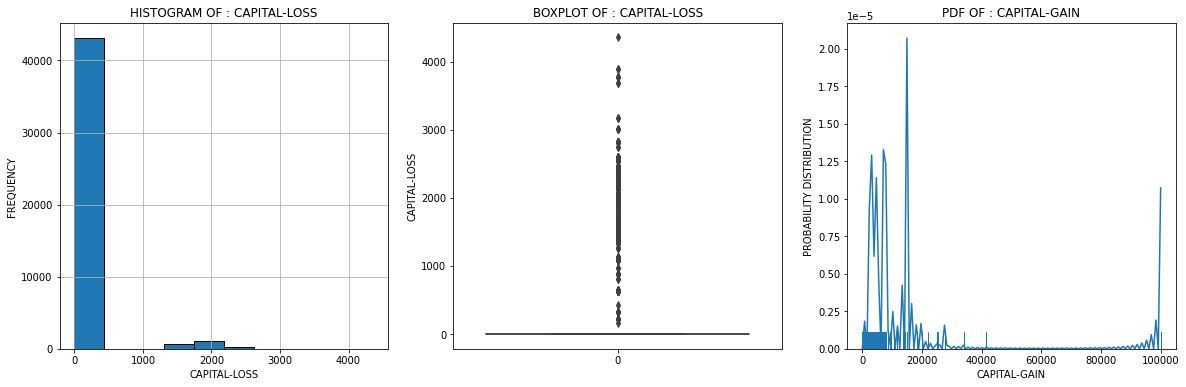

In [444]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
df['capital-loss'].hist(edgecolor='black')
plt.xlabel("CAPITAL-LOSS")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF : CAPITAL-LOSS")

plt.subplot(1,3,2)
sb.boxplot(data=df['capital-loss'])
plt.ylabel("CAPITAL-LOSS")
plt.title("BOXPLOT OF : CAPITAL-LOSS")

plt.subplot(1,3,3)
sb.distplot(df['capital-gain'],hist=False,rug=True)
plt.xlabel("CAPITAL-GAIN")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF : CAPITAL-GAIN")

plt.show()

**OBERSVATION :** 
* Min. capital-loss is 0 and Max. capital-loss is 4356
* Median is around 0
* IQR spread is (0-0) : 0
* Most of capital-loss are lie between (0-450)
* There are so many outliers.
* It is high poistive skewed curved (skewness=4.5163)
* It is not a guassian distribution because it has positive kurtosis.

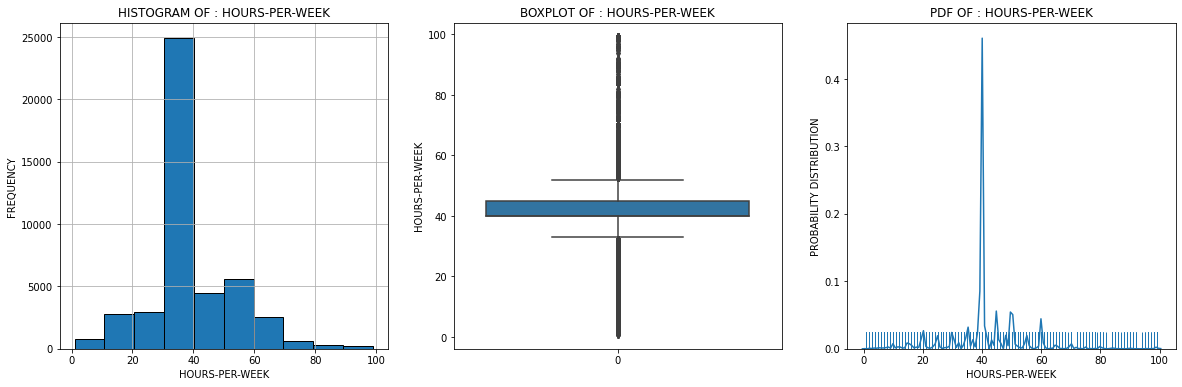

In [445]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
df['hours-per-week'].hist(edgecolor='black')
plt.xlabel("HOURS-PER-WEEK")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF : HOURS-PER-WEEK")

plt.subplot(1,3,2)
sb.boxplot(data=df['hours-per-week'])
plt.ylabel("HOURS-PER-WEEK")
plt.title("BOXPLOT OF : HOURS-PER-WEEK")

plt.subplot(1,3,3)
sb.distplot(df['hours-per-week'],hist=False,rug=True)
plt.xlabel("HOURS-PER-WEEK")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF : HOURS-PER-WEEK")

plt.show()

**OBERSVATION :** 
* Min. hours-per-week is 1 and Max. hours-per-week is 99
* Median is around 40
* IQR spread is (45-40) : 5
* Most of hours-per-week are lie between (30-40)
* There are so many outliers.
* It is very little poisitive skewed curve(Skewness=0.3405)
* It is a distrivution with positive kurtosis.

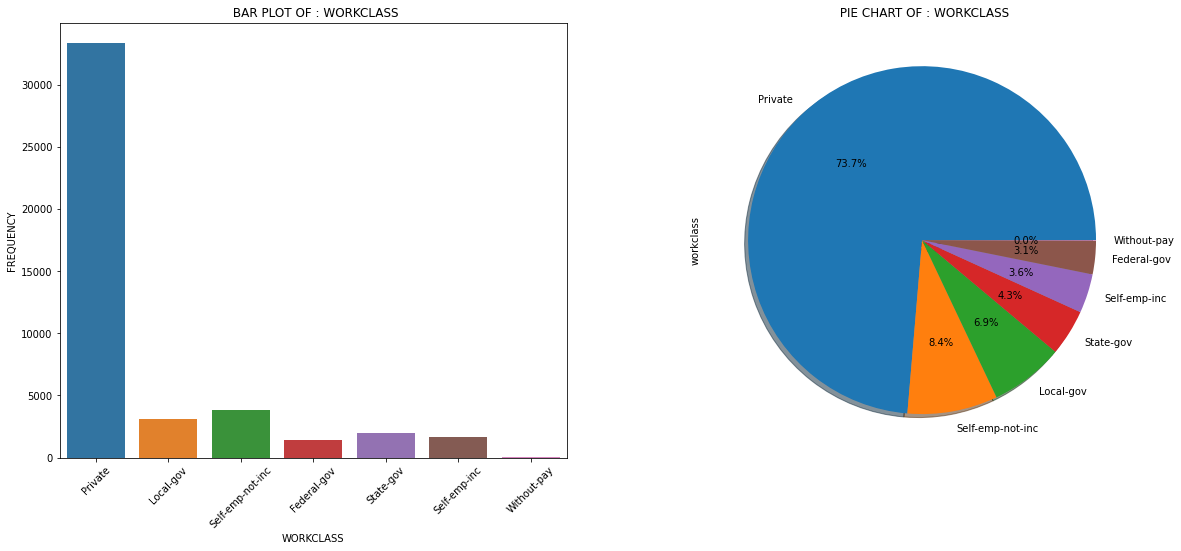

In [446]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sb.countplot(x="workclass", data=df)
plt.xlabel("WORKCLASS")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : WORKCLASS")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title(" PIE CHART OF : WORKCLASS")
df["workclass"].value_counts().plot.pie(autopct='%.1f%%', shadow=True)

plt.show()

**OBERSVATION :** 
* In this there most of people are from Private workclass (73.5%)
* There is very less person in without-pay.
* All other percentage distribution are shown above.

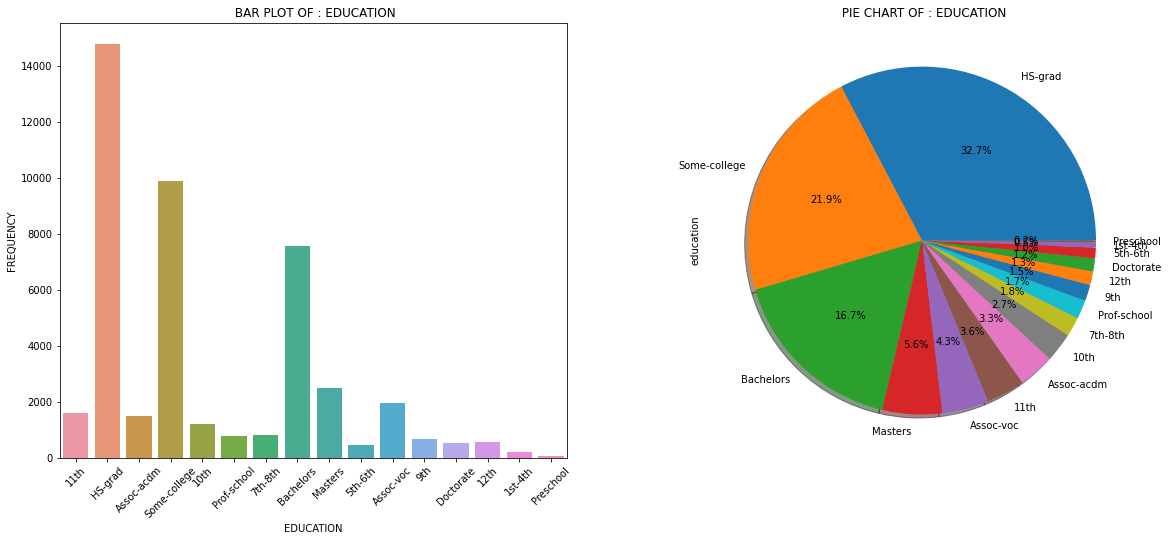

In [447]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sb.countplot(x="education", data=df)
plt.xlabel("EDUCATION")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : EDUCATION")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title(" PIE CHART OF : EDUCATION")
df["education"].value_counts().plot.pie(autopct='%.1f%%', shadow=True)

plt.show()

**OBERSVATION :** 
* In this there most of people are from higher school graduate (32.7%)
* Some people are from college (21.9%) and Bachelors (16.7%)
* All other percentage distribution are shown above.

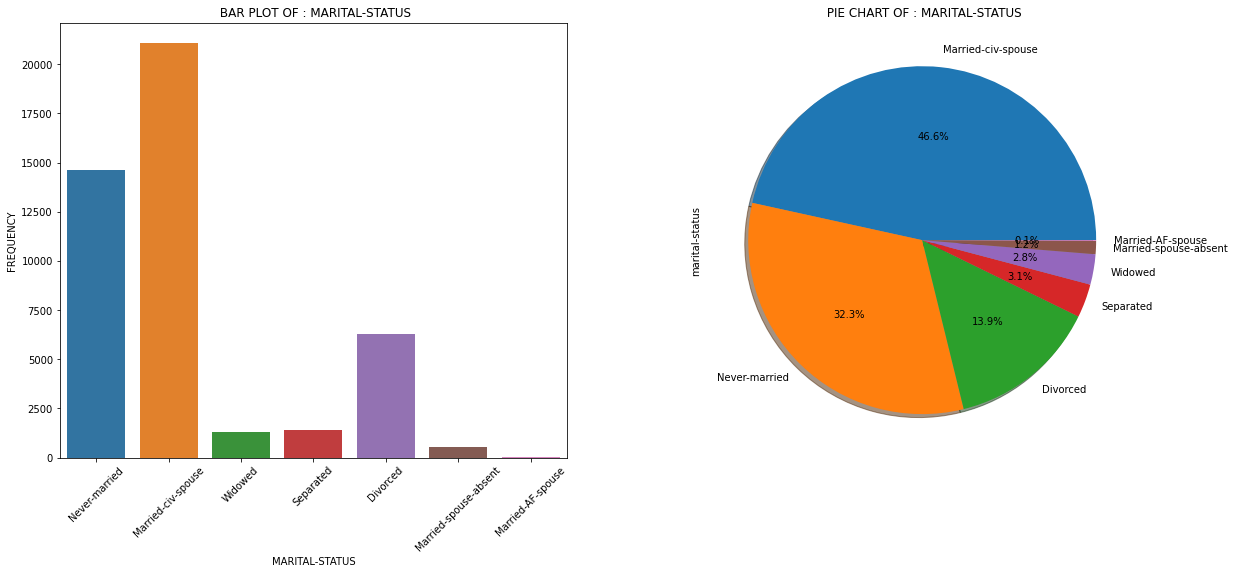

In [448]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sb.countplot(x="marital-status", data=df)
plt.xlabel("MARITAL-STATUS")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : MARITAL-STATUS")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title(" PIE CHART OF : MARITAL-STATUS")
df["marital-status"].value_counts().plot.pie(autopct='%.1f%%', shadow=True)

plt.show()

**OBERSVATION :** 
* In this there most of people are Married civillan spouse (46.6%)
* Some people are Never-married (32.3%) and Divorced (13.9%)
* There is only 0.1% people who are Married armed-forces spouse.
* All other percentage distribution are shown above.

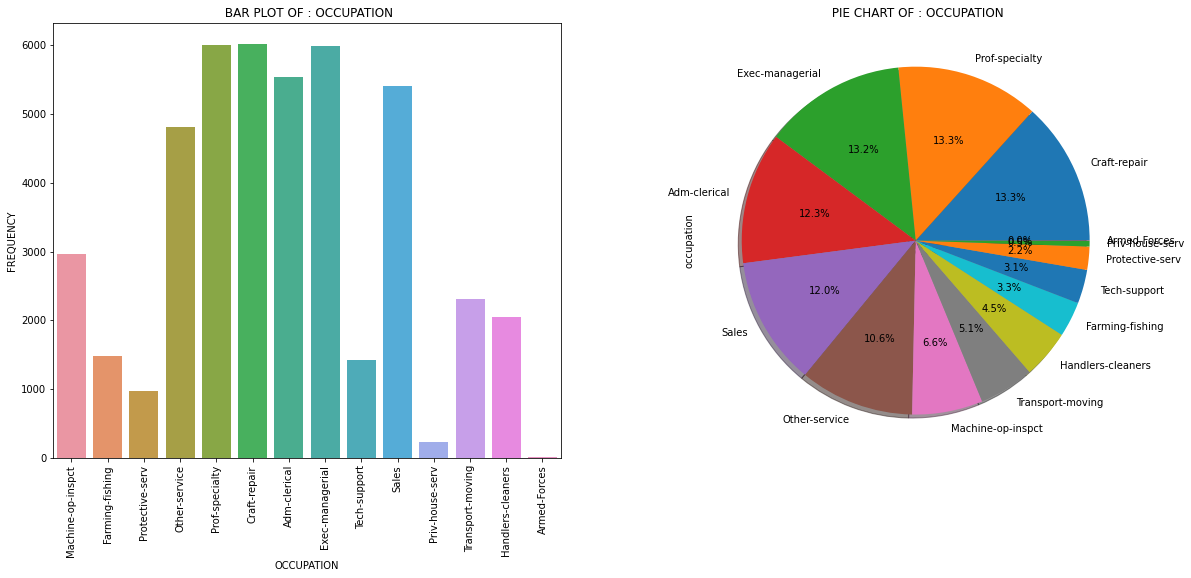

In [449]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sb.countplot(x="occupation", data=df)
plt.xlabel("OCCUPATION")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : OCCUPATION")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title(" PIE CHART OF : OCCUPATION")
df["occupation"].value_counts().plot.pie(autopct='%.1f%%', shadow=True)

plt.show()

**OBERSVATION :** 
* In this there most of people are in prof-specialty (13.3%) and Exec-managerial (13.2%).
* Some people are in Amd-clerical (12.3%) and sales (12.0%)
* There is very less people who are in armed-forces.
* All other percentage distribution are shown above.

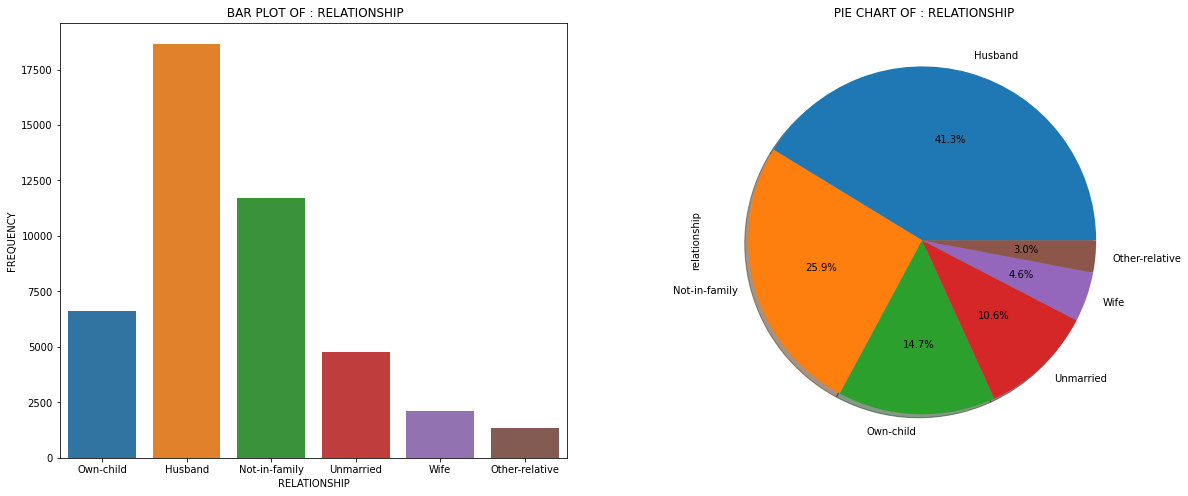

In [450]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sb.countplot(x="relationship", data=df)
plt.xlabel("RELATIONSHIP")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : RELATIONSHIP")

plt.subplot(1,2,2)
plt.title(" PIE CHART OF : RELATIONSHIP")
df["relationship"].value_counts().plot.pie(autopct='%.1f%%',shadow=True)

plt.show()

**OBERSVATION :** 
* In this there most of people are in Husband (41.3%) relationship.
* Some people those are not in family(25.9%) and some of are having their own child (14.7%).
* All other percentage distribution are shown above.

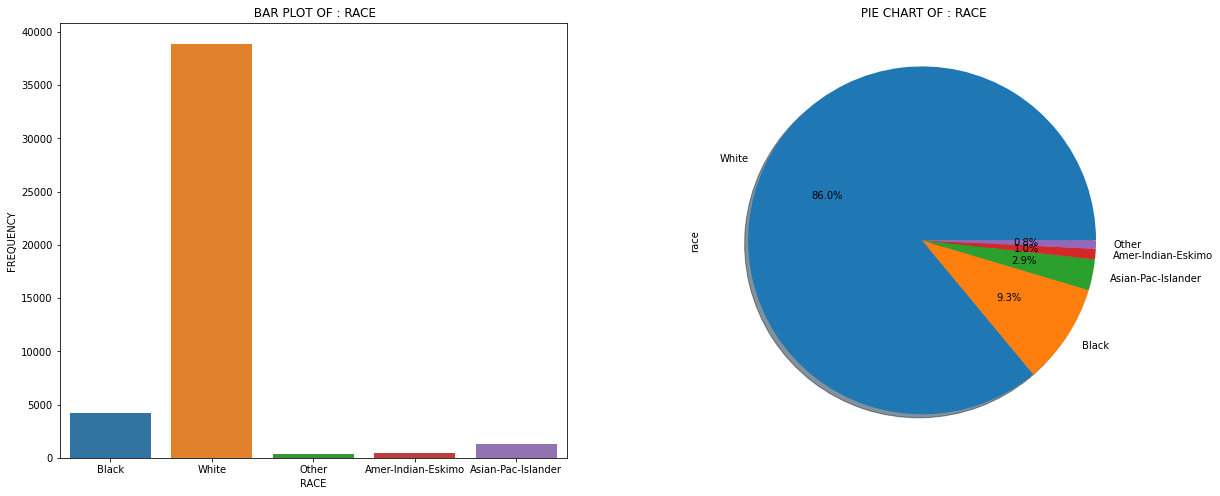

In [451]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sb.countplot(x="race", data=df)
plt.xlabel("RACE")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : RACE")

plt.subplot(1,2,2)
plt.title(" PIE CHART OF : RACE")
df["race"].value_counts().plot.pie(autopct='%.1f%%', shadow=True)

plt.show()

**OBERSVATION :** 
* In this there most of people are in white race (86.0%).
* Some people of black race(9.3%).
* All other percentage distribution are shown above. 

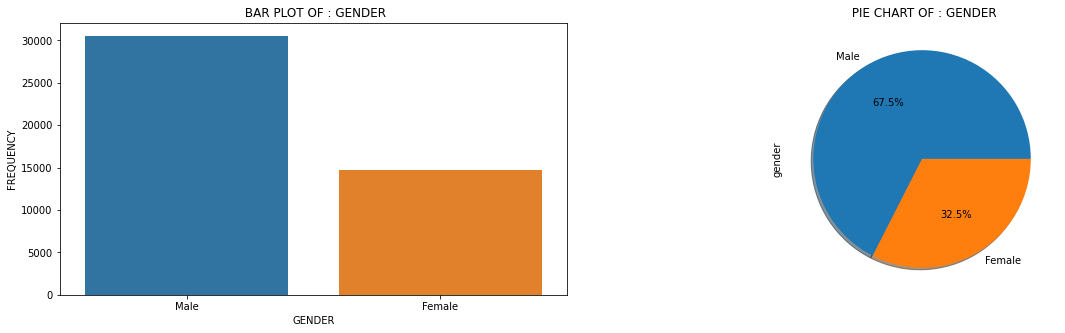

In [452]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
sb.countplot(x="gender", data=df)
plt.xlabel("GENDER")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : GENDER")

plt.subplot(1,2,2)
plt.title(" PIE CHART OF : GENDER")
df["gender"].value_counts().plot.pie(autopct='%.1f%%', shadow=True)

plt.show()

**OBERSVATION :** 
* In this males are in  majority (67.5%) and females are (32.5%).

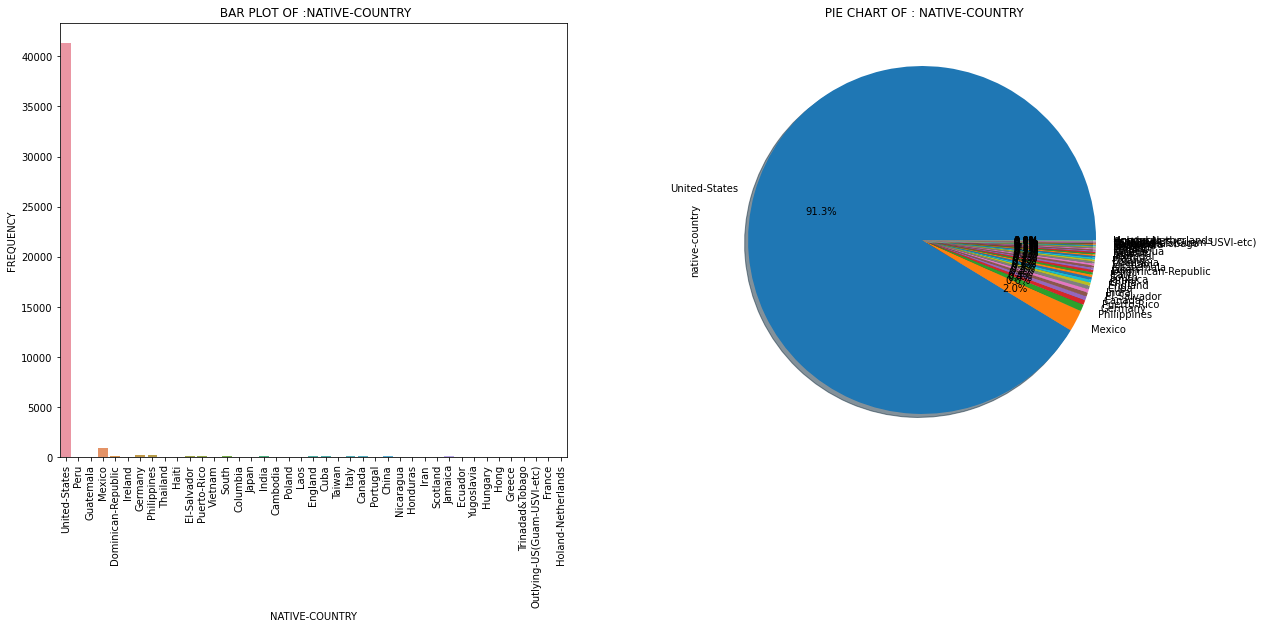

In [453]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sb.countplot(x="native-country", data=df)
plt.xlabel("NATIVE-COUNTRY")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF :NATIVE-COUNTRY")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title(" PIE CHART OF : NATIVE-COUNTRY")
df["native-country"].value_counts().plot.pie(autopct='%.1f%%', shadow=True)

plt.show()

**OBERSVATION :**  
* Mostly people are from united states (91.3%)
* Very few are from mexico and phillippinnes. 
* All other percentage distribution are shown above. 

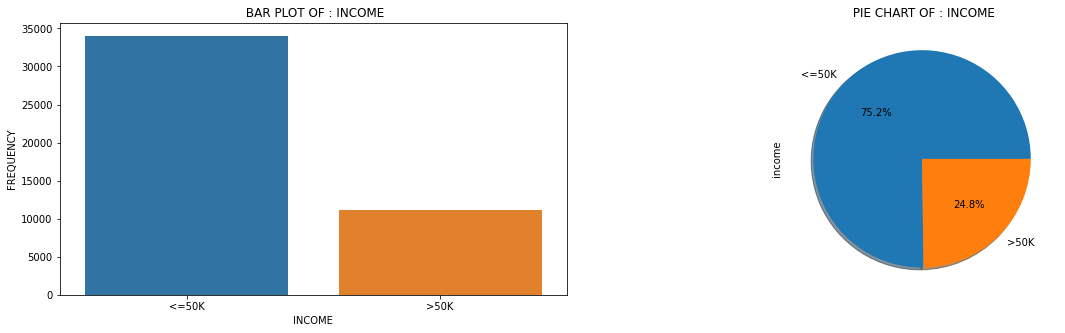

In [454]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
sb.countplot(x="income", data=df)
plt.xlabel("INCOME")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF : INCOME")

plt.subplot(1,2,2)
plt.title(" PIE CHART OF : INCOME")
df["income"].value_counts().plot.pie(autopct='%.1f%%', shadow=True)

plt.show()

**OBSERVATION :** 
* Most of people income is less than or equal to 50K (75.2%) and (24.8%) are having more then 50K income. 

## BIVARIATE ANALYSIS :

In [455]:
df.cov()

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,174.712093,1.269536,7.906093e+03,317.683292,16.187565
educational-num,1.269536,6.517202,2.431918e+03,84.473549,4.481768
capital-gain,7906.092955,2431.918128,5.634649e+07,-97583.839752,7560.437457
capital-loss,317.683292,84.473549,-9.758384e+04,163989.436496,263.523274
hours-per-week,16.187565,4.481768,7.560437e+03,263.523274,144.180254


**OBSERVATION :** 
* If age increases then values in all columns increases respectively.
* Same as for all columns but if capital-gain increses then capital-loss decreses and vice versa.

In [456]:
df.corr()

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037623,0.079683,0.059351,0.101992
educational-num,0.037623,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000


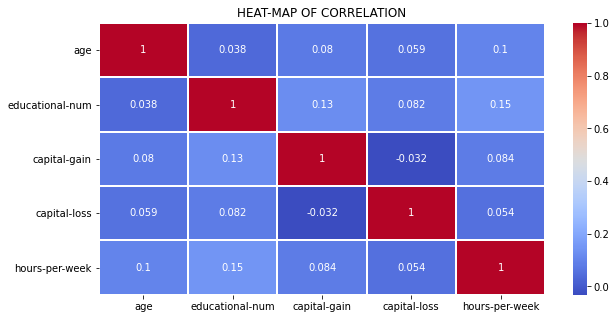

In [457]:
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(),annot=True,linewidths=1,cmap='coolwarm')
plt.title("HEAT-MAP OF CORRELATION")
plt.show()

**OBSERVATION :** 
* There is no that much of co-relation.
* There is lot of scattering in points.

<Figure size 1440x360 with 0 Axes>

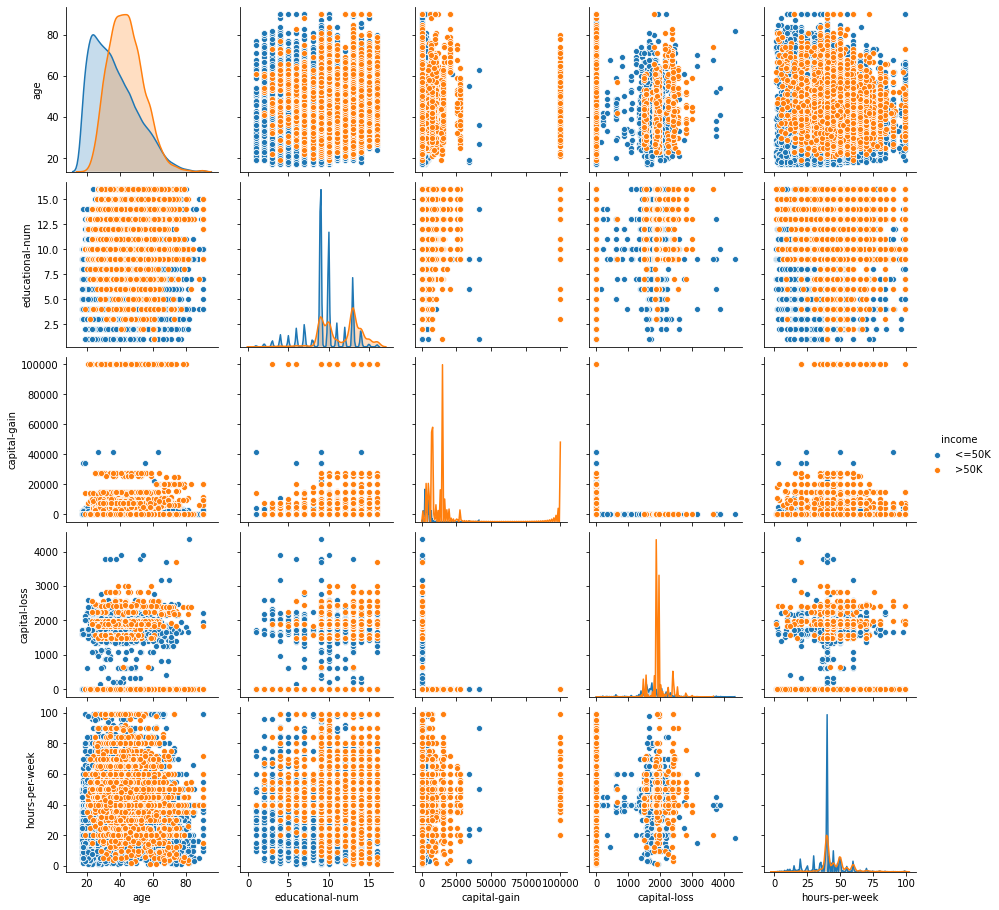

In [458]:
plt.figure(figsize=(20,5))
sb.pairplot(data=df,hue='income')
plt.show()

**OBSERVATION :** 
* We can see that there no that much of co-relation between any columns.
* People have less capital gain have more income.
* People have have more age have more income.
* People have less capital gain have more educational num.

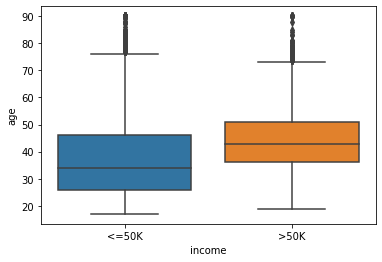

In [459]:
sb.boxplot(x="income", y="age", data=df)
plt.show()

**OBSERVATION :** 
* Median of people having income less than 50K is 35 years.
* Median of people having income greater than 50K is 45 years.
* In income less that 50K having outliers lies above 76 years.
* In income greater that 50K having outliers lies above 72 years.
* The of IQR of income (<=50k) is greater than IQR of income (>50k)

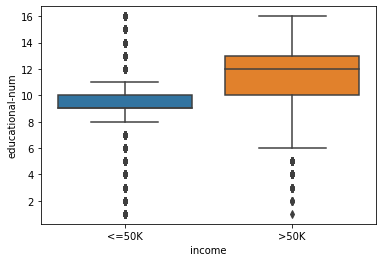

In [460]:
sb.boxplot(x="income", y="educational-num", data=df)
plt.show()

**OBSERVATION :** 
* Median of people having income less than 50K is 9 educational num.
* Median of people having income greater than 50K is 10 educational num.
* In income less that 50K having outliers lies above 11 and below 8 educational num.
* In income greater that 50K having outliers lies below 6 educational num.
* The of IQR of income (<=50k) is less than IQR of income (>50k)

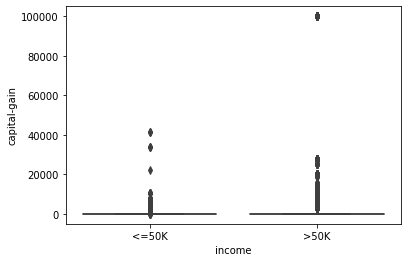

In [461]:
sb.boxplot(x="income", y="capital-gain", data=df)
plt.show()

**OBSERVATION :** 
* Both Income have Median is 0.
* Both Income have lot of outliers.
* Both Income have 0 IQR

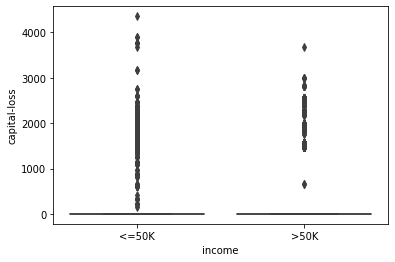

In [462]:
sb.boxplot(x="income", y="capital-loss", data=df)
plt.show()

**OBSERVATION :** 
* Both Income have Median is 0.
* Both Income have lot of outliers.
* Both Income have 0 IQR

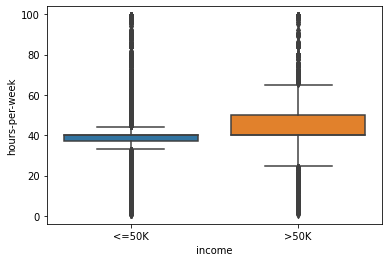

In [463]:
sb.boxplot(x="income", y="hours-per-week", data=df)
plt.show()

**OBSERVATION :** 
* Both Income have Median is 40 hours-per-week.
* Both Income have lot of outliers.
* The of IQR of income (<=50k) is less than IQR of income (>50k)

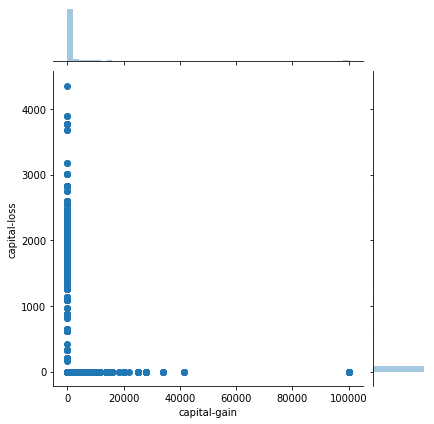

In [464]:
sb.jointplot(x='capital-gain', y='capital-loss',data=df, kind='scatter')
plt.show()

**OBSERVATION**
* The capital gain and capital loss cannot sustain simunltaneously.

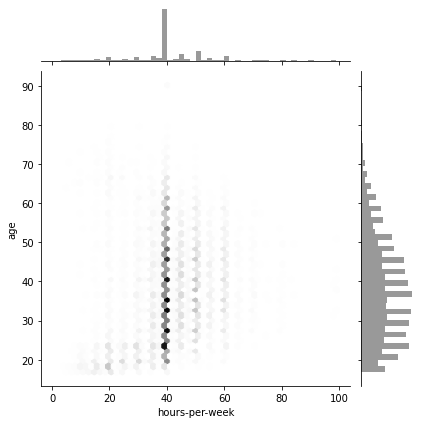

In [465]:
sb.jointplot(x=df['hours-per-week'], y=df['age'], kind='hex', color='k')
plt.show()

**OBSERVATION :** 
* There is high density of 40 hours-per-week at age from 20-70 years.

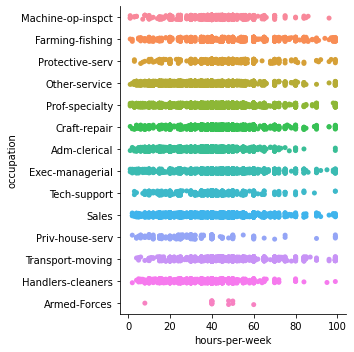

In [466]:
sb.catplot(x="hours-per-week", y="occupation", data=df)
plt.show()

**OBSERVATION :** 
* Farming-fishing are working more than all others.

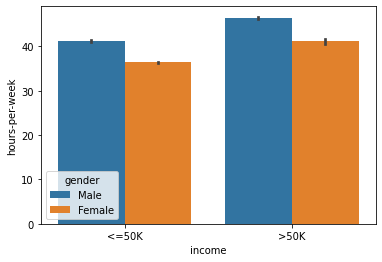

In [467]:
sb.barplot(x="income", y="hours-per-week", data=df,hue="gender")
plt.show()

**OBSERVATION :** 
* Male worked more than Female.
* Male have more income than Female.

## CONCLUSION :

* The Adult Income Dataset initally have total **48822** rows and **15** columns.
* From **15** columns :  **6** numerical columns and **9** categorical columns.
* After that we identify that there is some missing values if form of '?', then we change '?' into NaN.
  * workclass column have null value is **2799**
  * occupation column have null value is **2809**
  * native-country column have null value is **857**
* Treating null values by removing rows which contain null values and drop a column **'fnlwgt'** because it is worthless.
* After handling missing values we find that **7.41%** data are removed that is worthless.
* Captial Gain and Capital Loss has lot of outliers.
* Most of have Native-country : United States.
* People are working irrespective of their age.
* We can clearly see the Race discrimination that time.(White skinned people get higher income than others.)
* Majority of people are working is Male.
* Male worked more than female.
* Male also have more income than female.
* There is a Gender Inequality.

## Feature Transformation:-

In [0]:
# importing some library.

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

**Numerical Features :**

In [469]:
# Standardize numerical columns

min_max_scaler=preprocessing.MinMaxScaler()
num_col=['age','educational-num','capital-gain','capital-loss','hours-per-week']
df[num_col]=min_max_scaler.fit_transform(df[num_col])
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
5,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,Private,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
48838,0.315068,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
48839,0.561644,Private,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
48840,0.068493,Private,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [470]:
# droping categorical column.

obj_col=[]
for i in df:
    if df[i].dtype == "object":
        obj_col.append(i)
num_data=df.drop(obj_col,axis=1)
num_data

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.400000,0.000000,0.0,0.397959
1,0.287671,0.533333,0.000000,0.0,0.500000
2,0.150685,0.733333,0.000000,0.0,0.397959
3,0.369863,0.600000,0.076881,0.0,0.397959
5,0.232877,0.333333,0.000000,0.0,0.295918
...,...,...,...,...,...
48837,0.136986,0.733333,0.000000,0.0,0.377551
48838,0.315068,0.533333,0.000000,0.0,0.397959
48839,0.561644,0.533333,0.000000,0.0,0.397959
48840,0.068493,0.533333,0.000000,0.0,0.193878


**Categorical Feartures :**

In [471]:
# making dummy values for all categorical columns

workclass_dummy=pd.get_dummies(df['workclass'])
education_dummy=pd.get_dummies(df['education'])
marital_dummy=pd.get_dummies(df['marital-status'])
occ_dummy=pd.get_dummies(df['occupation'])
relation_dummy=pd.get_dummies(df['relationship'])
race_dummy=pd.get_dummies(df['race'])
gender_dummy=pd.get_dummies(df['gender'])
native_dummy=pd.get_dummies(df['native-country'])
income_dummy=pd.get_dummies(df['income'])

# Concatenation of all dummy columns and num_data

new_df=pd.concat((num_data,workclass_dummy,education_dummy,marital_dummy,occ_dummy,relation_dummy,race_dummy,gender_dummy,native_dummy,income_dummy),axis=1)

new_df

,age,educational-num,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,...,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,<=50K,>50K
0,0.109589,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.287671,0.533333,0.000000,0.0,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.150685,0.733333,0.000000,0.0,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.369863,0.600000,0.076881,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,0.232877,0.333333,0.000000,0.0,0.295918,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.733333,0.000000,0.0,0.377551,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
48838,0.315068,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
48839,0.561644,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
48840,0.068493,0.533333,0.000000,0.0,0.193878,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


**NOTE :**
* We make income and gender in one column.
  * In gender column : '0' is for male and '1' is for female.
  * In income column : '0' is for <=50K and '1' is for >50K.

In [472]:
# drop male column and make it 1 single column gender same in income.
new_df=new_df.drop(['Male','<=50K'],axis=1)
new_df=new_df.rename(columns={"Female":"Gender"})
new_df=new_df.rename(columns={">50K":"Income"})
        
new_df

,age,educational-num,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,...,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Income
0,0.109589,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.287671,0.533333,0.000000,0.0,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.150685,0.733333,0.000000,0.0,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.369863,0.600000,0.076881,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,0.232877,0.333333,0.000000,0.0,0.295918,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.733333,0.000000,0.0,0.377551,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48838,0.315068,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
48839,0.561644,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48840,0.068493,0.533333,0.000000,0.0,0.193878,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**OBSERVATION**
* After handling missing values there is 14 columns.
* Then after Standardize columns are 103.
